In [1]:
import json
from alpha_vantage_helper import AlphaVantageHelper
from alpha_vantage.timeseries import TimeSeries

# Load the API key from the config file
with open('config.json', 'r') as config_file:
    config = json.load(config_file)
    api_key = config['alpha_vantage_api_key2']


## Nasdaq 100

In [2]:
helper = AlphaVantageHelper(api_key)

# Get all nasdaq-100 symbols
nasdaq_symbols = helper.get_nasdaq_symbols()

print("Number of Active Stock Symbols:", len(nasdaq_symbols))
print("Example Active Stock Symbols:", nasdaq_symbols)

Number of Active Stock Symbols: 90
Example Active Stock Symbols: ['CPRT', 'AMGN', 'CMCSA', 'INTC', 'KLAC', 'PCAR', 'CTAS', 'PAYX', 'LRCX', 'ROST', 'MNST', 'ADBE', 'FAST', 'EA', 'CSCO', 'REGN', 'IDXX', 'VRTX', 'BIIB', 'ODFL', 'QCOM', 'GILD', 'SNPS', 'SBUX', 'SIRI', 'INTU', 'MCHP', 'ORLY', 'DLTR', 'ASML', 'ANSS', 'CTSH', 'CSGP', 'EBAY', 'BKNG', 'ISRG', 'MRVL', 'ILMN', 'ADI', 'AEP', 'AMD', 'CDNS', 'CSX', 'HON', 'MU', 'XEL', 'EXC', 'PEP', 'TXN', 'WBA', 'ALGN', 'SGEN', 'MDLZ', 'NFLX', 'GOOGL', 'DXCM', 'TMUS', 'MELI', 'VRSK', 'FTNT', 'CHTR', 'NXPI', 'ENPH', 'FANG', 'PANW', 'GOOG', 'JD', 'KHC', 'TEAM', 'BKR', 'ZS', 'PDD', 'MRNA', 'CRWD', 'ZM', 'DDOG', 'ABNB', 'CEG', 'GFS', 'AZN', 'TTD', 'LULU', 'AMAT', 'GEHC', 'KDP', 'WBD', 'COST', 'LCID', 'MAR', 'ADP']


In [12]:
import time
# Set the API rate limit parameters
symbols_per_minute = 5
seconds_per_minute = 60

# Define the data folder and CSV file path
data_folder = 'data'
filename = "nasdaq_monthly_adjusted.csv"

# Loop through the nasdaq symbols with a rate limit
for i in range(0, len(nasdaq_symbols), symbols_per_minute):
    batch = nasdaq_symbols[i:i + symbols_per_minute]
    helper.extend_stock_data_csv(batch, data_folder, filename)
    
    # Wait for 1 minute before making the next batch of requests
    if i + symbols_per_minute < len(nasdaq_symbols):
        print("Waiting for 1 minute...")
        time.sleep(seconds_per_minute)


CSV data for CMCSA extended in: data/nasdaq_monthly_adjusted.csv
CSV data for INTC extended in: data/nasdaq_monthly_adjusted.csv
Waiting for 1 minute...
CSV data for CTAS extended in: data/nasdaq_monthly_adjusted.csv
CSV data for PAYX extended in: data/nasdaq_monthly_adjusted.csv
CSV data for LRCX extended in: data/nasdaq_monthly_adjusted.csv
CSV data for ADSK extended in: data/nasdaq_monthly_adjusted.csv
Waiting for 1 minute...
CSV data for ROST extended in: data/nasdaq_monthly_adjusted.csv
CSV data for MNST extended in: data/nasdaq_monthly_adjusted.csv
CSV data for MSFT extended in: data/nasdaq_monthly_adjusted.csv
CSV data for ADBE extended in: data/nasdaq_monthly_adjusted.csv
CSV data for FAST extended in: data/nasdaq_monthly_adjusted.csv
Waiting for 1 minute...
CSV data for EA extended in: data/nasdaq_monthly_adjusted.csv
CSV data for CSCO extended in: data/nasdaq_monthly_adjusted.csv
CSV data for REGN extended in: data/nasdaq_monthly_adjusted.csv
CSV data for IDXX extended in: da

<Axes: xlabel='Date', ylabel='adjusted close'>

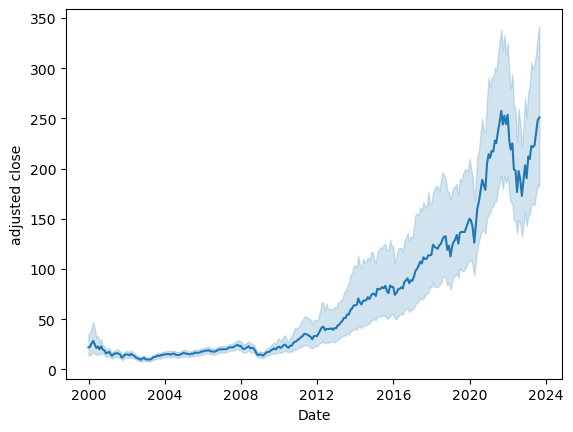

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
csv_file_path = 'data/nasdaq_monthly_adjusted.csv'  # Replace with the actual path
df = pd.read_csv(csv_file_path)

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['timestamp'])

sns.lineplot(data=df, x="Date", y="adjusted close")


In [4]:
ts = TimeSeries(key=api_key, output_format="pandas")
nasdaq = ts.get_monthly_adjusted("COMP")



ValueError: Thank you for using Alpha Vantage! You have reached the 100 requests/day limit for your free API key. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.